<a href="https://colab.research.google.com/github/Madhu2303a51846/merge-file/blob/master/SESD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== Dataset Loaded =====
             id                src              repo               path  \
0  ifd0tvbdivuz          synthetic  example_repo_140   pkg/module_54.py   
1  1fpkh1dnmmjb  codextglue_sample  example_repo_138   pkg/module_16.py   
2  kw5ngcx1945n  codextglue_sample  example_repo_163   pkg/module_47.py   
3  yzycwtiqj7yh  codextglue_sample  example_repo_197  pkg/module_100.py   
4  oc6uzhr5xff0          synthetic   example_repo_68   pkg/module_96.py   

       function_name                                               code  \
0      parse_items_0  def parse_items_0(a,b):\n    """Auto-generated...   
1      fetch_lines_1  def fetch_lines_1(text):\n    """Auto-generate...   
2  encode_elements_2  def encode_elements_2(items):\n    """Auto-gen...   
3    count_records_3  def count_records_3(lst):\n    """Auto-generat...   
4         add_file_4  def add_file_4(a,b):\n    """Auto-generated sm...   

                                           docstring  \
0  parse_items

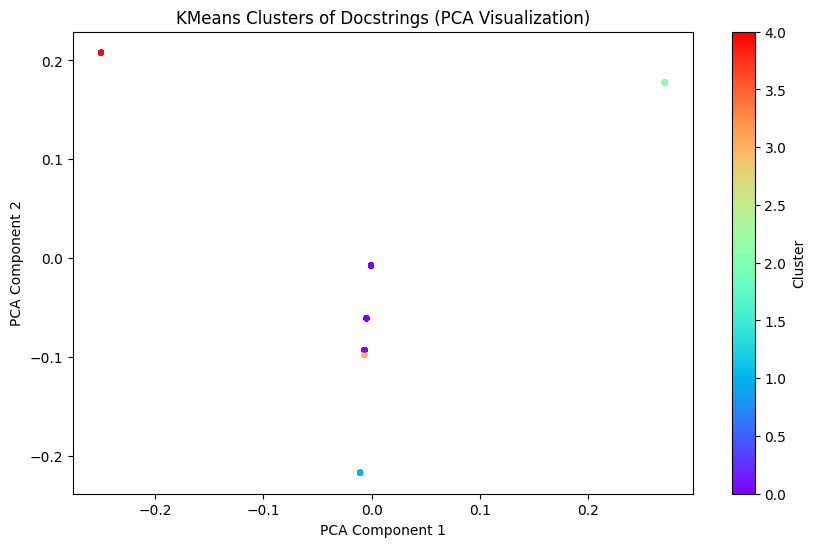

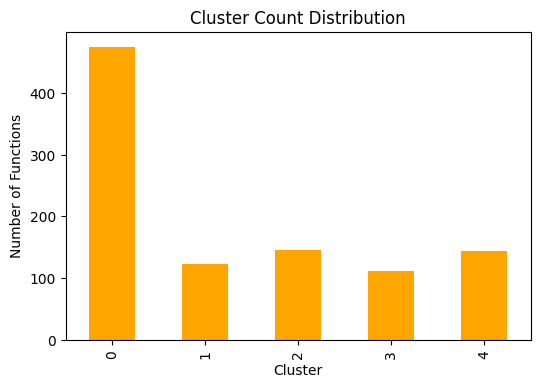

In [1]:
# ============================================================
#   ML MODELS FOR NON-NUMERIC DATASET (TEXT-BASED)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------
file_path = "/content/generated_1000rows_dataset.xlsx"
df = pd.read_excel(file_path)

print("\n===== Dataset Loaded =====")
print(df.head())
print("Shape:", df.shape)

# Ensure docstring is string
df["docstring"] = df["docstring"].astype(str)

# ------------------------------------------------------------
# 2. TF-IDF Vectorization
# ------------------------------------------------------------
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df["docstring"])

print("\nTF-IDF Shape:", X.shape)

# ------------------------------------------------------------
# 3. Model 1 — Text Classification (Predict src)
# ------------------------------------------------------------
if "src" in df.columns:
    y = df["src"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train, y_train)

    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)

    print("\n===== Classification Model =====")
    print("Accuracy:", acc)
    print(classification_report(y_test, preds))

else:
    print("Column 'src' not found; skipping classification.")

# ------------------------------------------------------------
# 4. Model 2 — KMeans Clustering (Groups Similar Docstrings)
# ------------------------------------------------------------
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

df["cluster"] = clusters

print("\n===== Clustering Completed =====")
print(df[["function_name", "cluster"]].head())

# ------------------------------------------------------------
# 5. Visualization — PCA Scatter Plot of Clusters
# ------------------------------------------------------------
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='rainbow', s=10)
plt.title("KMeans Clusters of Docstrings (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# ------------------------------------------------------------
# 6. Visualization — Cluster Counts (Bar Chart)
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))
df["cluster"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Cluster Count Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Functions")
plt.show()